## 数据读取

In [1]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('C:/Users/kit/Data set analysis/train.csv',sep='\t')
test_data = pd.read_csv('C:/Users/kit/Data set analysis/test.csv', sep='\t')
user = pd.read_json('C:/Users/kit/Data set analysis/user.json')
edge = pd.read_json('C:/Users/kit/Data set analysis/edge.json')

## 数据分析

In [3]:
user['profile'].iloc[0]

{'id': 15750898,
 'id_str': '15750898',
 'name': 'FOX 13 Tampa Bay',
 'screen_name': 'FOX13News',
 'location': 'Tampa, FL',
 'profile_location': None,
 'description': "Bringing you the important stuff like breaking news & weather alerts. But also plenty of fun stuff, like sports updates and all those 'only-in-Florida' stories.",
 'url': 'https://t.co/RtP9QYEZCq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/RtP9QYEZCq',
     'expanded_url': 'http://www.FOX13news.com',
     'display_url': 'FOX13news.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 327587,
 'friends_count': 4801,
 'listed_count': 1744,
 'created_at': 'Wed Aug 06 15:12:10 +0000 2008',
 'favourites_count': 2946,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 192876,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '00064

In [4]:
train_data['Label'].value_counts()

0    8391
1    2109
Name: Label, dtype: int64

In [5]:
edge['relation'].value_counts() 

friends      9029
followers    8927
Name: relation, dtype: int64

### 用户数据

In [6]:
user_profile = pd.DataFrame.from_records(user['profile'].dropna())
user_profile.drop(['id_str'], axis=1, inplace=True)
user_profile = pd.merge(user_profile, train_data, left_on='id', right_on='ID')
user_profile.drop(['ID'], axis=1, inplace=True)

In [7]:
user_profile[user_profile['Label'] == 1]['url'].isnull().mean()

0.5395922238027501

In [8]:
user_profile[user_profile['Label'] == 0]['url'].isnull().mean()

0.6698450536352801

In [9]:
user_profile.groupby('Label')[
    ['followers_count','friends_count',
     'listed_count','favourites_count',
     'statuses_count','friends_count']
].mean()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,friends_count
Label,,,,,,
0,115402.226449,2803.626282,248.667064,10156.157047,13859.653589,2803.626282
1,43869.289711,4487.011854,298.246562,13045.115220,16134.768611,4487.011854


In [10]:
user_profile['created_at'] = pd.to_datetime(user_profile['created_at'])
user_profile['created_at_year'] = user_profile['created_at'].dt.year
user_profile['created_at_month'] = user_profile['created_at'].dt.month

<Axes: xlabel='created_at_year', ylabel='count'>

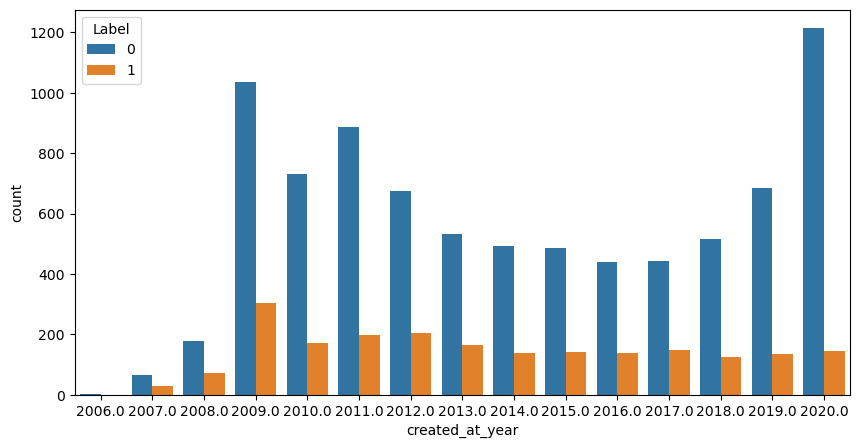

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='created_at_year', hue='Label', data=user_profile)

In [12]:
normalized_year = user_profile.groupby(['created_at_year', 'Label']).size() / user_profile.groupby('Label').size()
normalized_year = normalized_year.reset_index(name='Normalized_Year')

<Axes: xlabel='created_at_year', ylabel='Normalized_Year'>

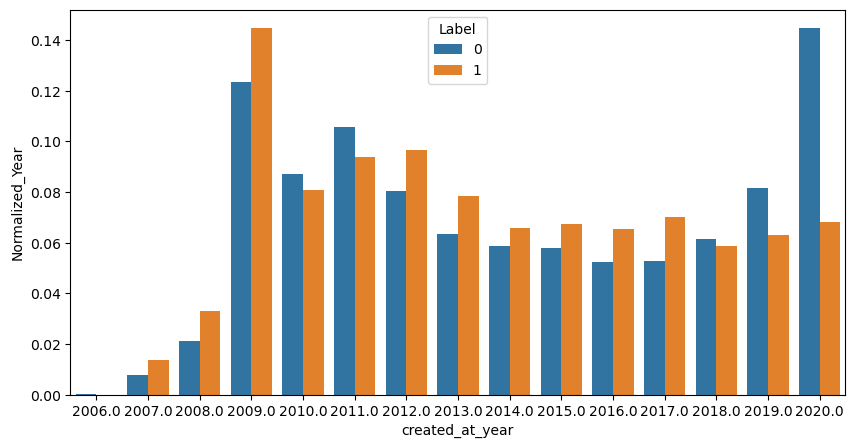

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='created_at_year', y='Normalized_Year', hue='Label', data=normalized_year)

<Axes: xlabel='created_at_month', ylabel='count'>

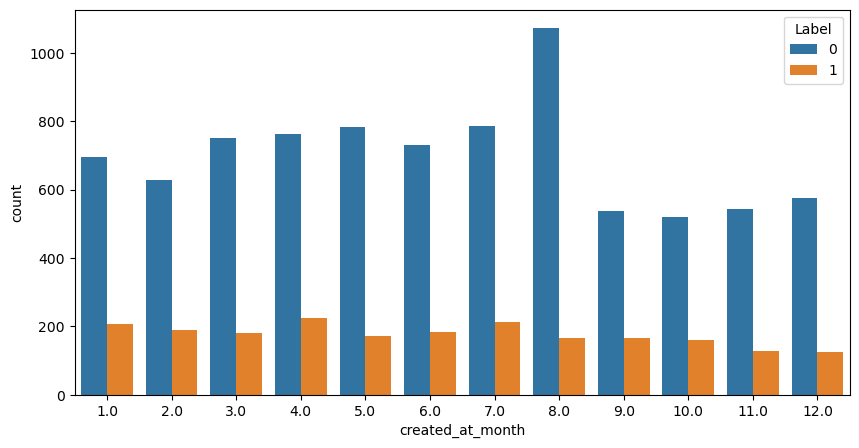

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='created_at_month', hue='Label', data=user_profile)

In [15]:
normalized_month = user_profile.groupby(['created_at_month', 'Label']).size() / user_profile.groupby('Label').size()
normalized_month = normalized_month.reset_index(name='Normalized_Month')

<Axes: xlabel='created_at_month', ylabel='Normalized_Month'>

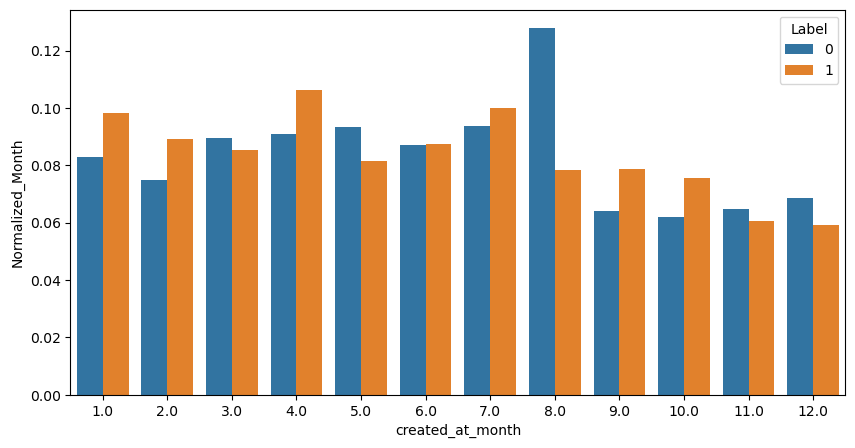

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='created_at_month', y='Normalized_Month', hue='Label', data=normalized_month)

<Axes: xlabel='geo_enabled', ylabel='count'>

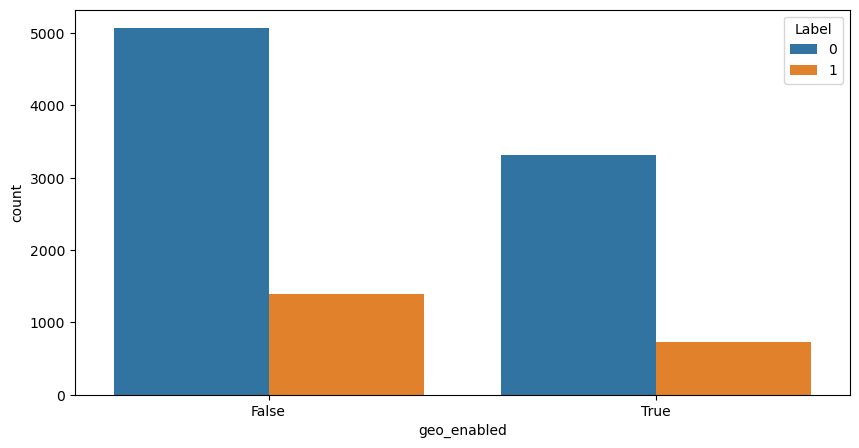

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='geo_enabled', hue='Label', data=user_profile)

In [18]:
normalized_geo = user_profile.groupby(['geo_enabled', 'Label']).size() / user_profile.groupby('Label').size()
normalized_geo = normalized_geo.reset_index(name='Normalized_Geo')

<Axes: xlabel='geo_enabled', ylabel='Normalized_Geo'>

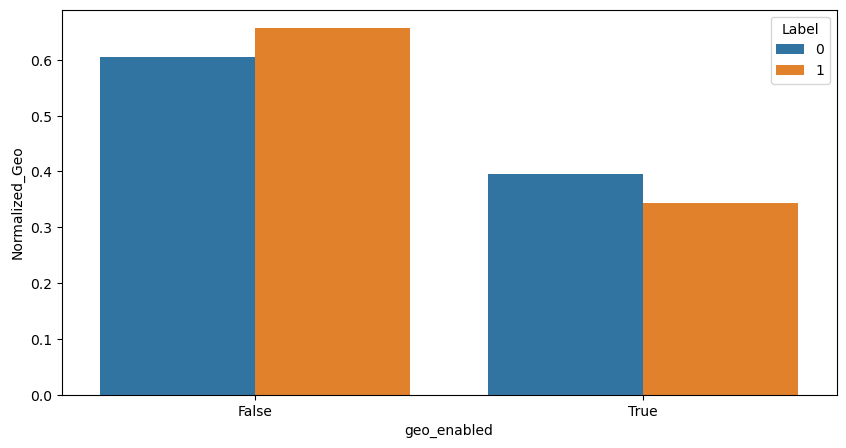

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='geo_enabled', y='Normalized_Geo', hue='Label', data=normalized_geo)

<Axes: xlabel='contributors_enabled', ylabel='count'>

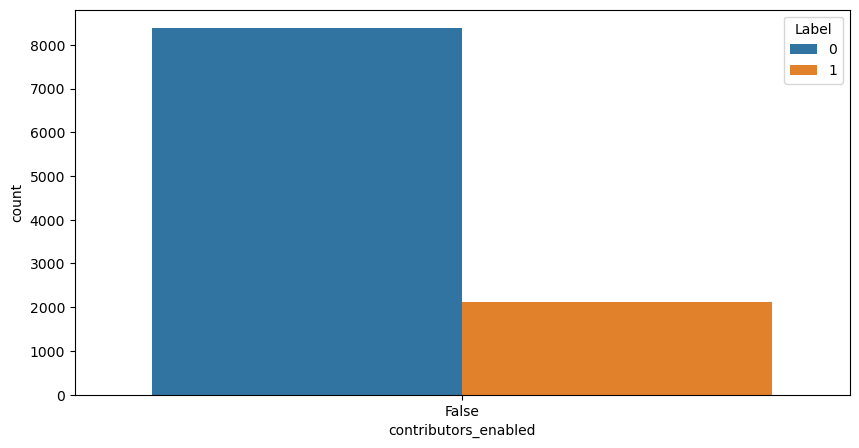

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='contributors_enabled', hue='Label', data=user_profile)

In [21]:
normalized_contributors = user_profile.groupby(['contributors_enabled','Label']).size()/user_profile.groupby('Label').size()
normalized_contributors = normalized_contributors.reset_index(name='Normalized_Contributors')

<Axes: xlabel='contributors_enabled', ylabel='Normalized_Contributors'>

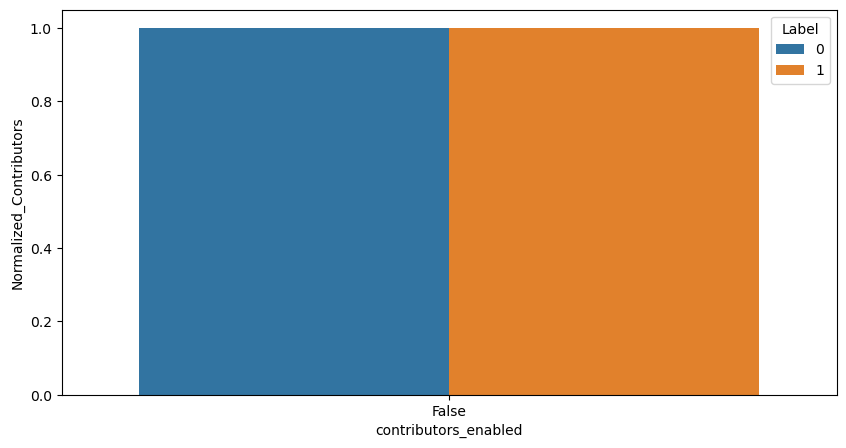

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='contributors_enabled',y='Normalized_Contributors',hue='Label',data=normalized_contributors)

### 推文数据

In [23]:
user['tweet_avg_char'] = user['tweet'].fillna(' ').apply(lambda texts: np.mean([len(x) for x in texts]))
user['tweet_max_char'] = user['tweet'].fillna(' ').apply(lambda texts: np.max([len(x) for x in texts]))
user['retweet_avg'] = user['tweet'].fillna(' ').apply(lambda texts: np.mean(['RT' in x for x in texts]))
user['tweet_avg_word'] = user['tweet'].fillna(' ').apply(lambda texts: np.mean([len(x.split()) for x in texts]))
user['tweet_all_word'] = user['tweet'].fillna(' ').apply(lambda texts: len(' '.join(texts).split()))

In [24]:
user_tweet = pd.merge(user, train_data, left_on='ID', right_on='ID')
user_tweet.corr()

C:\Users\kit\AppData\Local\Temp\ipykernel_1464\1722075158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_tweet.corr()


,ID,tweet_avg_char,tweet_max_char,retweet_avg,tweet_avg_word,tweet_all_word,Label
ID,1.000000,-0.188664,-0.178045,-0.045988,-0.201947,-0.280840,-0.057995
tweet_avg_char,-0.188664,1.000000,0.737208,0.340620,0.965458,0.857077,0.252557
tweet_max_char,-0.178045,0.737208,1.000000,0.245761,0.728701,0.726339,0.144843
retweet_avg,-0.045988,0.340620,0.245761,1.000000,0.334544,0.305705,0.202145
tweet_avg_word,-0.201947,0.965458,0.728701,0.334544,1.000000,0.877607,0.224839
tweet_all_word,-0.280840,0.857077,0.726339,0.305705,0.877607,1.000000,0.203246
Label,-0.057995,0.252557,0.144843,0.202145,0.224839,0.203246,1.000000


<Axes: xlabel='Label', ylabel='tweet_avg_char'>

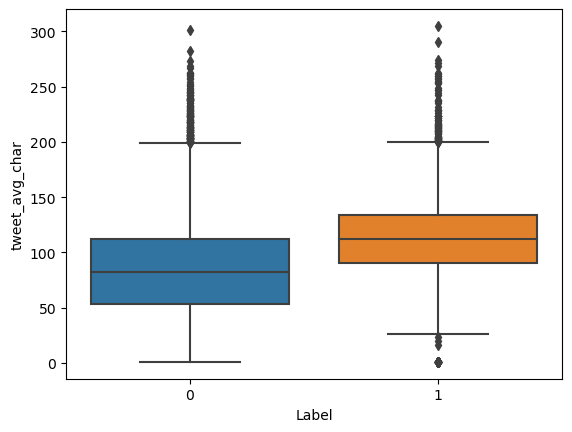

In [25]:
sns.boxplot(x='Label',y='tweet_avg_char',data=user_tweet)

<Axes: xlabel='Label', ylabel='tweet_avg_word'>

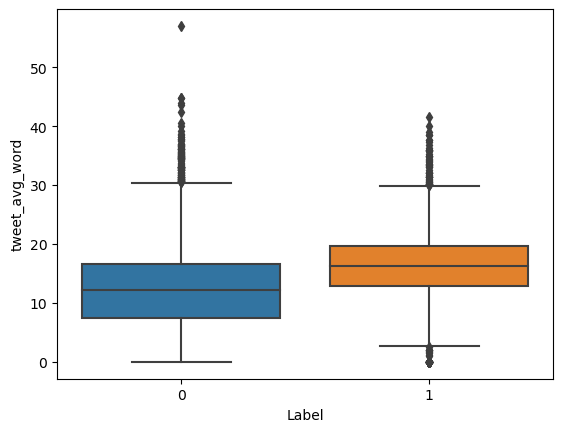

In [26]:
sns.boxplot(x='Label',y='tweet_avg_word',data=user_tweet)

### 关系数据

In [27]:
edge.head(1)

,seed_user_id,relation,relation_user_id
0,15750898,followers,2324715174


In [28]:
import networkx as nx
G = nx.DiGraph()

g_edges = list(edge[edge['relation'] == 'followers'][['relation_user_id', 'seed_user_id']].values) + list(edge[edge['relation'] != 'followers'][['seed_user_id','relation_user_id',]].values)
G.add_edges_from(g_edges)

In [29]:
nxstat = pd.concat([
    pd.DataFrame.from_dict(nx.pagerank(G), orient='index').reset_index(),
    pd.DataFrame(G.in_degree())[[1]], 
    pd.DataFrame(G.out_degree())[[1]]
],axis=1)

nxstat.columns = ['ID', 'pagerank', 'in_degree', 'out_degree']

In [30]:
user_network = pd.merge(user, nxstat, left_on='ID', right_on='ID')
user_network = pd.merge(user_network, train_data, left_on='ID', right_on='ID')

<Axes: xlabel='Label', ylabel='pagerank'>

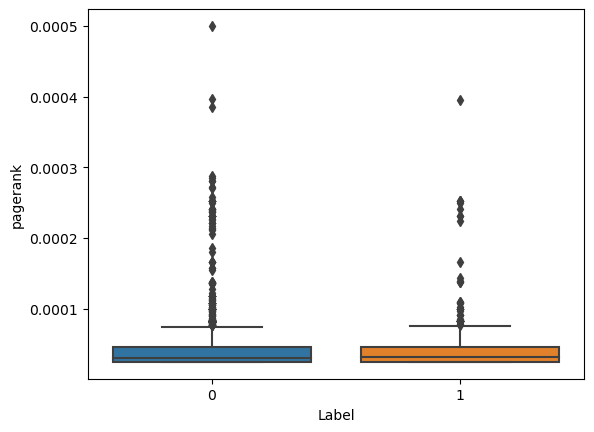

In [31]:
sns.boxplot(y='pagerank', x='Label', data=user_network)

In [32]:
user_network.groupby('Label')[
    ['pagerank', 'in_degree', 'out_degree']
].mean()

,pagerank,in_degree,out_degree
Label,,,
0,0.000038,0.572090,0.609294
1,0.000038,0.566976,0.613997
